In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Versão FastAI: 1.0.47
from fastai import *
from fastai.vision import *
from fastai.vision.gan import *
from fastai.callbacks.hooks import *
from fastai.imports import *

import os

import warnings
warnings.filterwarnings("ignore")

print(os.listdir("./dataset/"))

['processo', 'boletos']


In [2]:
img_dir='./dataset/'
path = Path(img_dir)

In [3]:
data = ImageDataBunch.from_folder(path, 
                                  train=".",
                                  valid_pct=0.2,
                                  size=224,bs=64, 
                                  num_workers=0).normalize(imagenet_stats)

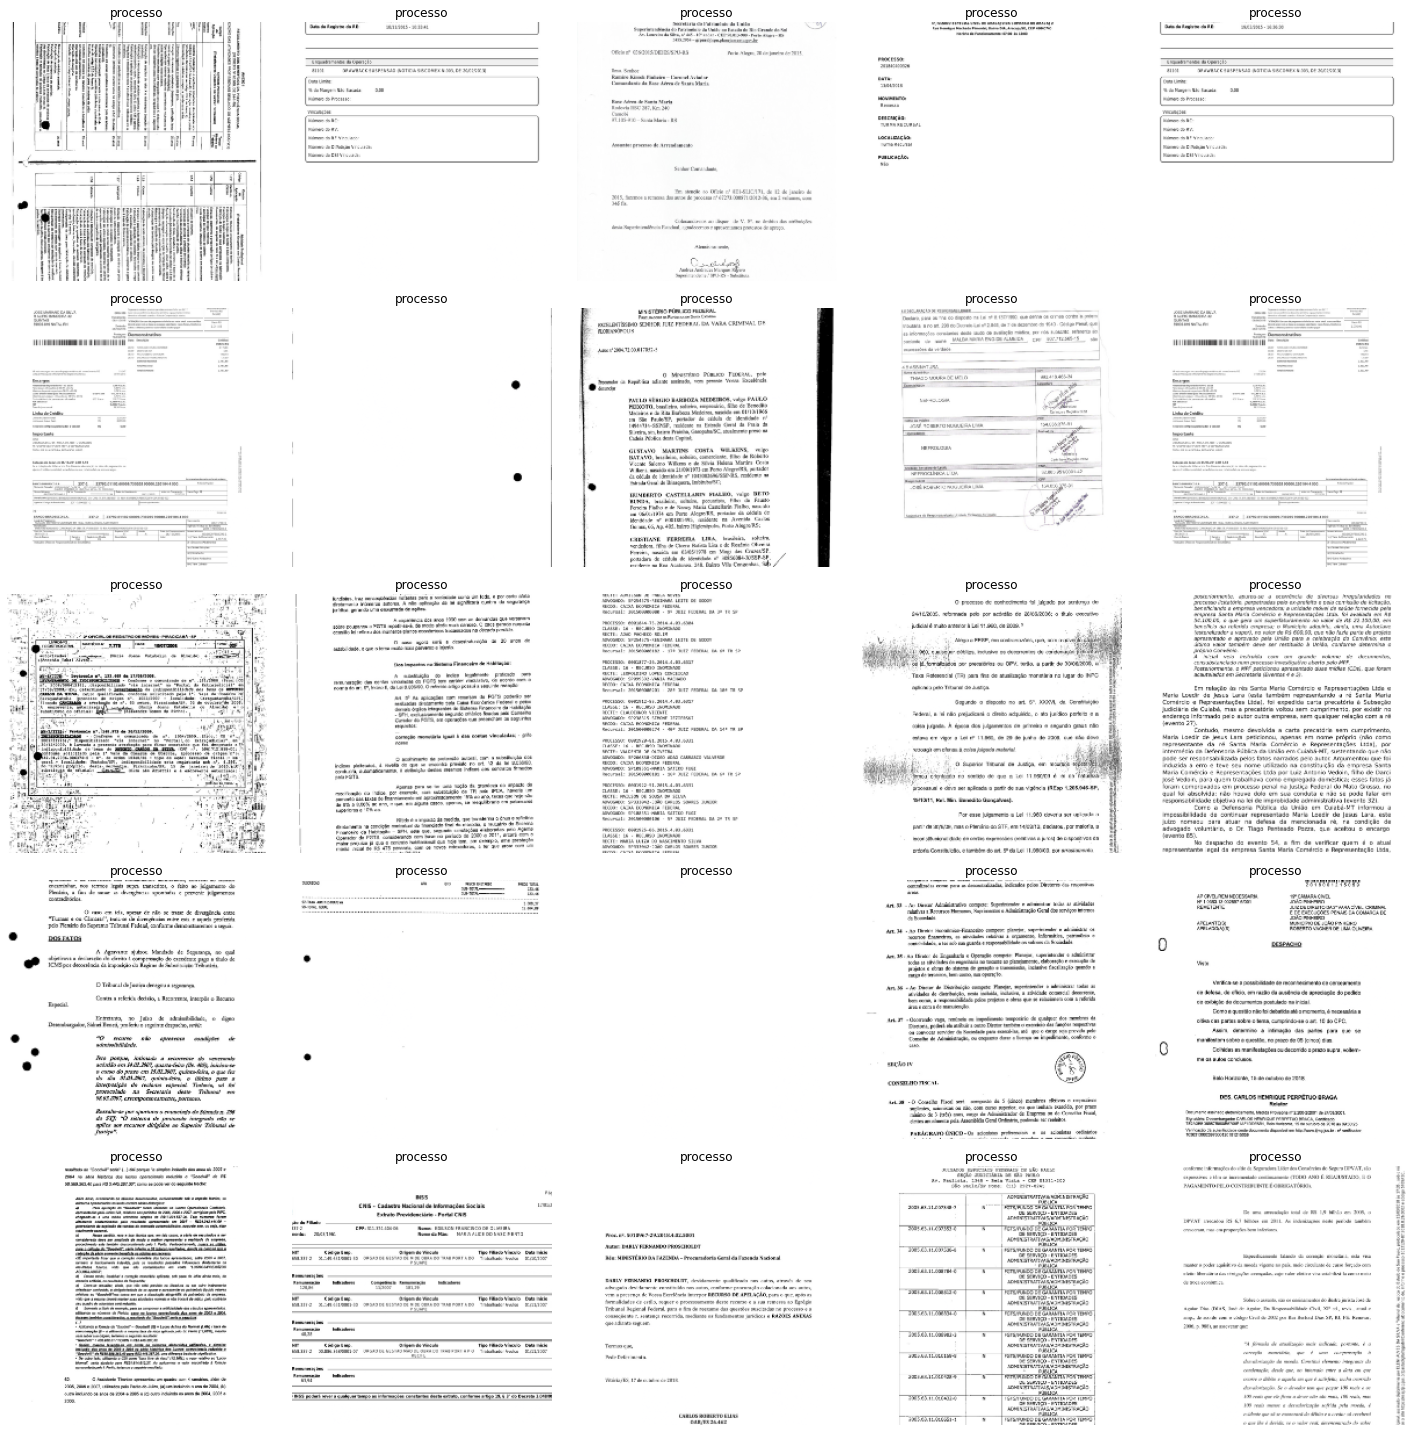

In [4]:
data.show_batch(rows=5)

In [5]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy, error_rate], model_dir="./model/")

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


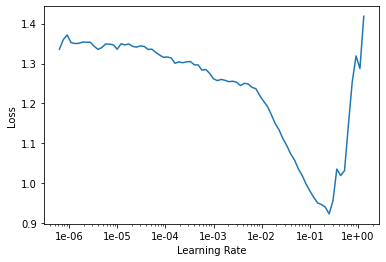

In [6]:
learn.lr_find()
learn.recorder.plot()

In [7]:
learn_rate = 1e-02
learn.fit_one_cycle(6, slice(learn_rate))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.649443,0.207357,0.919153,0.080847,19:14
1,0.188310,0.088735,0.976901,0.023099,19:19
2,0.069886,0.026437,0.992300,0.007700,19:16
3,0.032633,0.038671,0.986525,0.013474,19:19
4,0.016831,0.017523,0.995188,0.004812,19:18
5,0.009763,0.017439,0.995188,0.004812,19:15


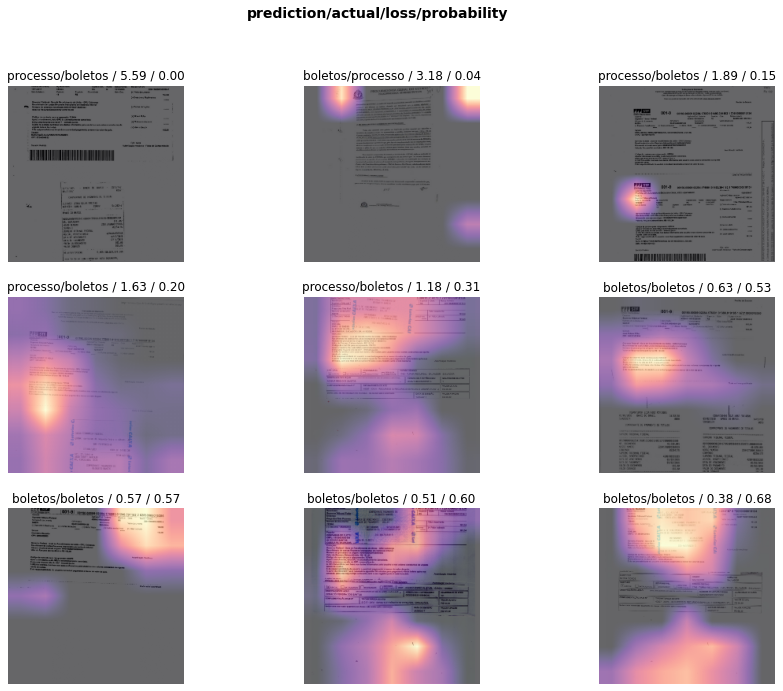

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

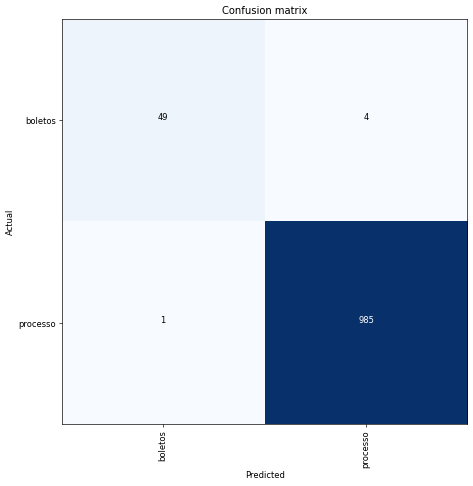

In [9]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

In [10]:
learn.export()

In [11]:
# Métricas no dado de Validação

In [78]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

In [79]:
preds_valid, y_valid = learn.get_preds(ds_type=DatasetType.Valid)

In [80]:
preds_valid = np.argmax(preds_valid, 1)

In [81]:
confusion_matrix(y_valid, preds_valid)

array([[ 49,   4],
       [  1, 985]])

In [82]:
print('f1-score: '+str(f1_score(y_valid, preds_valid)))
print('accuracy: '+str(accuracy_score(y_valid, preds_valid)))

f1-score: 0.9974683544303797
accuracy: 0.9951876804619827


In [83]:
print(classification_report(y_valid, preds_valid))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        53
           1       1.00      1.00      1.00       986

    accuracy                           1.00      1039
   macro avg       0.99      0.96      0.97      1039
weighted avg       1.00      1.00      1.00      1039



In [84]:
# Métricas no dado de Teste

In [85]:
learn.data.add_test(ImageList.from_folder('../teste/'))

In [86]:
preds_test, y_test = learn.get_preds(ds_type=DatasetType.Test)

In [87]:
preds_test = np.argmax(preds_test, 1)
preds_test

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [88]:
y_test = []
for x in range(250):
    y_test.append(1)

for x in range(50):
    y_test.append(0)

In [89]:
torch.tensor(y_test)

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [90]:
confusion_matrix(y_test, preds_test)

array([[ 47,   3],
       [  2, 248]])

In [91]:
print('f1-score: '+str(f1_score(y_test, preds_test)))
print('accuracy: '+str(accuracy_score(y_test, preds_test)))

f1-score: 0.9900199600798404
accuracy: 0.9833333333333333


In [92]:
print(classification_report(y_test, preds_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        50
           1       0.99      0.99      0.99       250

    accuracy                           0.98       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.98      0.98      0.98       300



In [93]:
# Matrizes de confusão

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

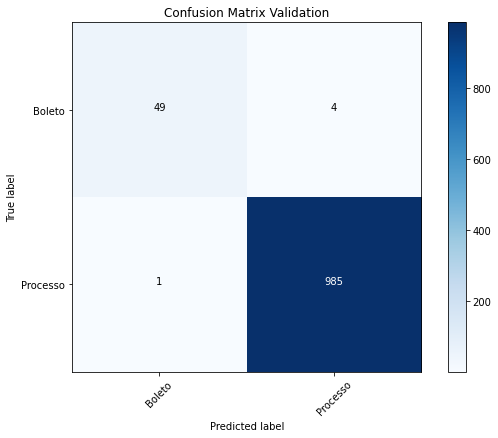

In [95]:
plot_confusion_matrix(cm           = confusion_matrix(y_valid,preds_valid), 
                      normalize    = False,
                      target_names = ['Boleto', 'Processo'],
                      title        = "Confusion Matrix Validation")

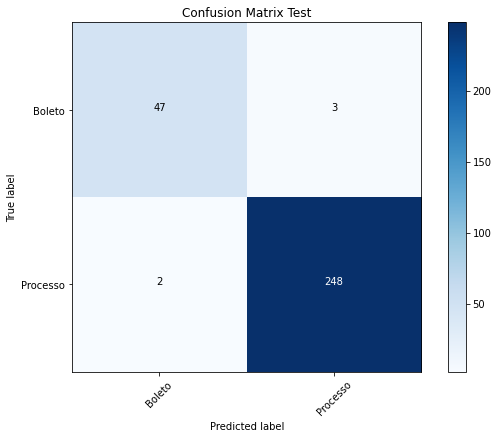

In [96]:
plot_confusion_matrix(cm           = confusion_matrix(y_test,preds_test), 
                      normalize    = False,
                      target_names = ['Boleto', 'Processo'],
                      title        = "Confusion Matrix Test")